<a href="https://colab.research.google.com/github/stev3j/MachineLearning_Practice/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
# 데이터 나누기

wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target, random_state=42, test_size=0.2)

In [19]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [20]:
# 데이터 전처리

from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()
ss.fit(train_input) # 이건 뭔디여
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [23]:
# 결정 트리

from sklearn.tree import DecisionTreeClassifier 

In [26]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [29]:
# 결정 트리 그림으로 표현하기

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

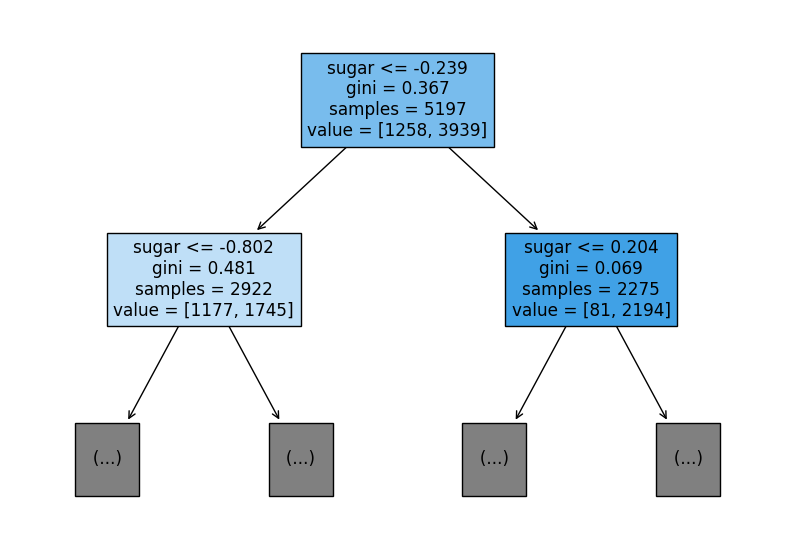

In [33]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # max_depth : 루트 노드를 제외한 노드의 수, filled : 색 추가 
plt.show()

In [34]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8874350586877044
0.8615384615384616


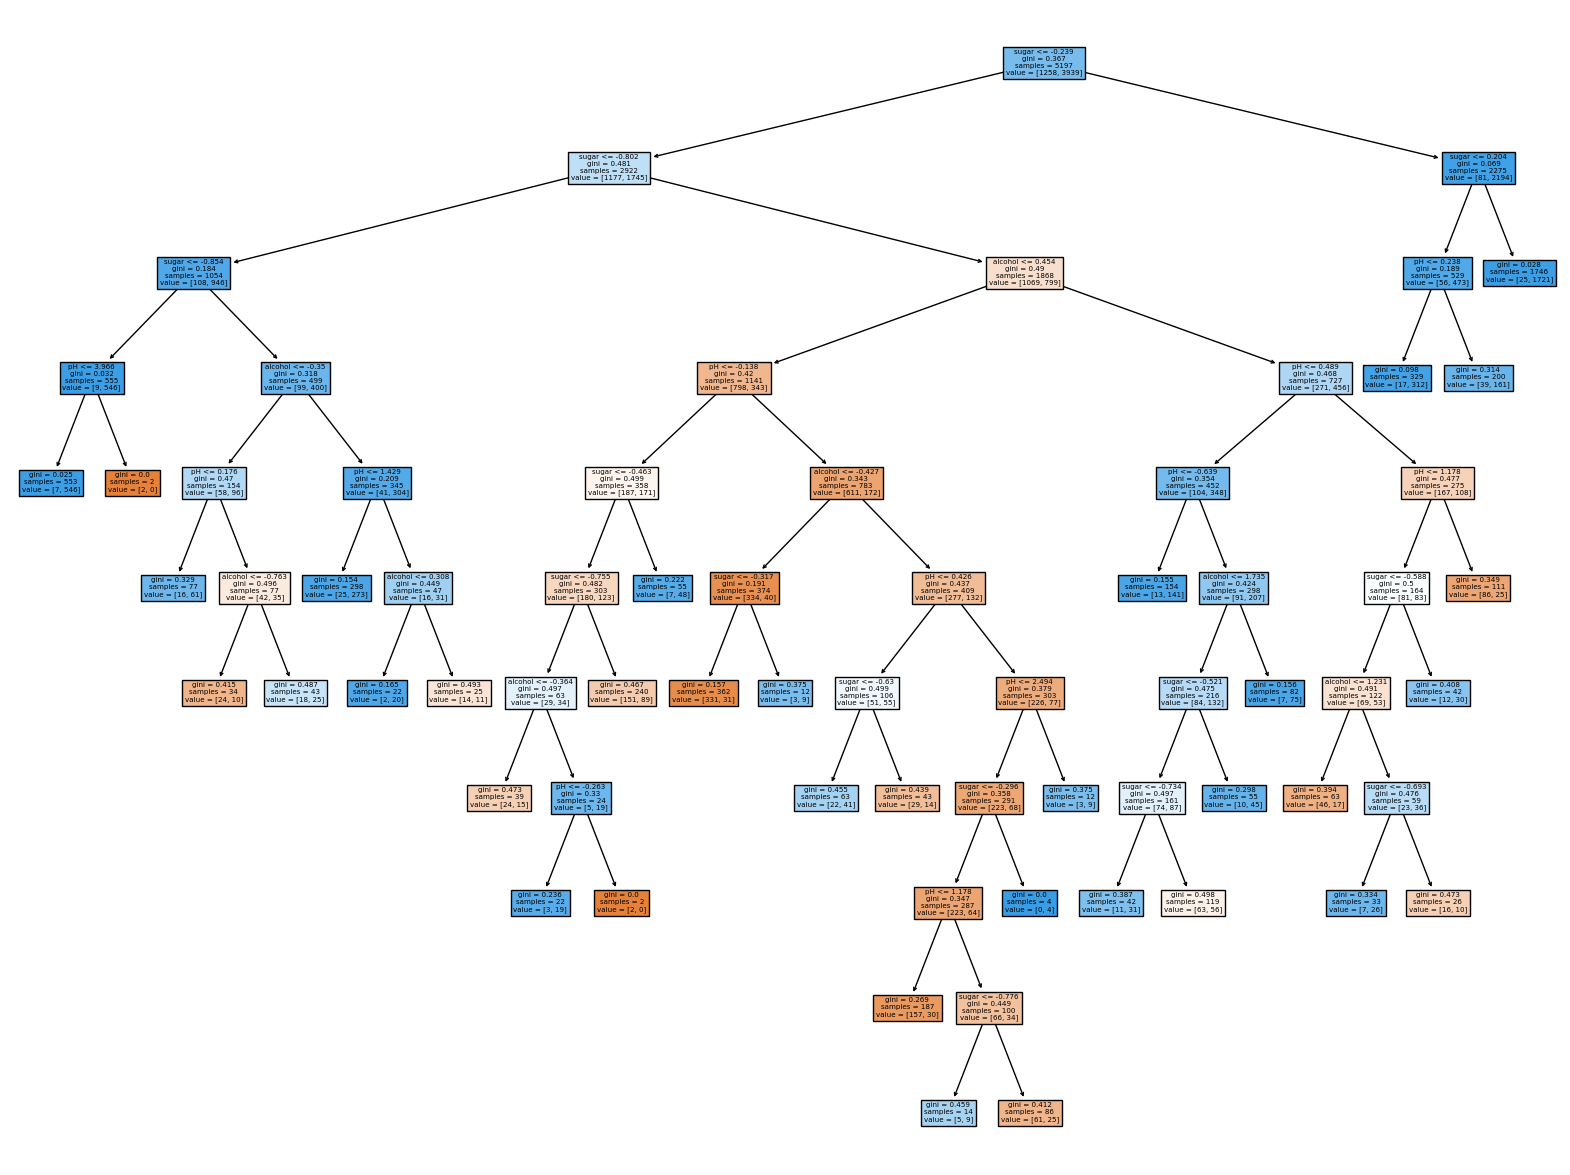

In [38]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()